In [1]:
#pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import os
import json
from pprint import pprint
import time
from datetime import datetime

from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv('weather_api_key')
type(weather_api_key)

str

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9264b6b72d38574591451900e75333f8


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kegayli
City not found. Skipping...
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | zhigansk
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | gornopravdinsk
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | siguiri
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | nakasongola
Processing Record 14 of Set 1 | aginskoye
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | la ronge
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | bambous virieux
Processing Re

Processing Record 38 of Set 4 | roald
Processing Record 39 of Set 4 | solnechnyy
Processing Record 40 of Set 4 | el prat de llobregat
Processing Record 41 of Set 4 | bengkalis
City not found. Skipping...
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | cuajinicuilapa
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | morant bay
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | richmond
Processing Record 1 of Set 5 | finnsnes
Processing Record 2 of Set 5 | vostok
Processing Record 3 of Set 5 | tinskoy
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | kismayo
Processing Record 6 of Set 5 | pueblo nuevo
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | skara
Processing Record 9 of Set 5 | mollendo
Processing Record 10 of

Processing Record 28 of Set 8 | alexandria
Processing Record 29 of Set 8 | kaolinovo
Processing Record 30 of Set 8 | igarka
Processing Record 31 of Set 8 | buala
Processing Record 32 of Set 8 | bairiki
Processing Record 33 of Set 8 | mabaruma
Processing Record 34 of Set 8 | sioux lookout
Processing Record 35 of Set 8 | haibowan
City not found. Skipping...
Processing Record 36 of Set 8 | kachikau
City not found. Skipping...
Processing Record 37 of Set 8 | road town
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | luganville
Processing Record 40 of Set 8 | ulverstone
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | yzeure
Processing Record 44 of Set 8 | cozumel
Processing Record 45 of Set 8 | hutchinson
Processing Record 46 of Set 8 | salinopolis
Processing Record 47 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 48 of Set 8 | nantong
Processing Record 49 of Set 8 | togul
Processi

Processing Record 16 of Set 12 | port-gentil
Processing Record 17 of Set 12 | hunza
City not found. Skipping...
Processing Record 18 of Set 12 | erenhot
Processing Record 19 of Set 12 | capivari
Processing Record 20 of Set 12 | hsichih
City not found. Skipping...
Processing Record 21 of Set 12 | ilo
Processing Record 22 of Set 12 | tarakan
Processing Record 23 of Set 12 | dalmatovo
Processing Record 24 of Set 12 | labelle
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | luena
Processing Record 27 of Set 12 | may pen
Processing Record 28 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 12 | shenjiamen
Processing Record 30 of Set 12 | paramonga
Processing Record 31 of Set 12 | pujehun
Processing Record 32 of Set 12 | kabare
Processing Record 33 of Set 12 | balabac
Processing Record 34 of Set 12 | shache
Processing Record 35 of Set 12 | kalispell
Processing Record 36 of Set 12 | beruni
City not found. Skipping...
Processing Record 

In [8]:
len(city_data)

582

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,46.22,94,97,8.30,CL,2022-07-25 03:19:31
1,Dingle,10.9995,122.6711,86.65,71,89,1.12,PH,2022-07-25 03:19:32
2,Albany,42.6001,-73.9662,74.26,86,99,6.44,US,2022-07-25 03:15:50
3,Mar Del Plata,-38.0023,-57.5575,51.10,96,100,11.50,AR,2022-07-25 03:17:58
4,Mahebourg,-20.4081,57.7000,61.09,94,75,4.61,MU,2022-07-25 03:19:33
5,Zhigansk,66.7697,123.3711,69.46,57,20,6.08,RU,2022-07-25 03:19:33
6,Souillac,-20.5167,57.5167,61.18,94,75,4.61,MU,2022-07-25 03:19:34
7,Gornopravdinsk,60.0500,69.9000,64.53,78,100,7.02,RU,2022-07-25 03:19:34
8,Bethel,41.3712,-73.4140,80.76,76,0,0.00,US,2022-07-25 03:16:14
9,Siguiri,11.6667,-9.5000,71.56,97,100,3.22,GN,2022-07-25 03:19:35


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2022-07-25 03:19:31,-41.8697,-73.8203,46.22,94,97,8.30
1,Dingle,PH,2022-07-25 03:19:32,10.9995,122.6711,86.65,71,89,1.12
2,Albany,US,2022-07-25 03:15:50,42.6001,-73.9662,74.26,86,99,6.44
3,Mar Del Plata,AR,2022-07-25 03:17:58,-38.0023,-57.5575,51.10,96,100,11.50
4,Mahebourg,MU,2022-07-25 03:19:33,-20.4081,57.7000,61.09,94,75,4.61
5,Zhigansk,RU,2022-07-25 03:19:33,66.7697,123.3711,69.46,57,20,6.08
6,Souillac,MU,2022-07-25 03:19:34,-20.5167,57.5167,61.18,94,75,4.61
7,Gornopravdinsk,RU,2022-07-25 03:19:34,60.0500,69.9000,64.53,78,100,7.02
8,Bethel,US,2022-07-25 03:16:14,41.3712,-73.4140,80.76,76,0,0.00
9,Siguiri,GN,2022-07-25 03:19:35,11.6667,-9.5000,71.56,97,100,3.22


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

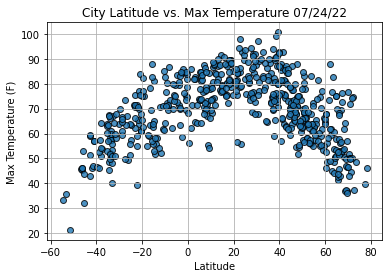

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

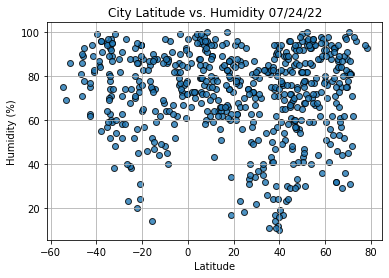

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

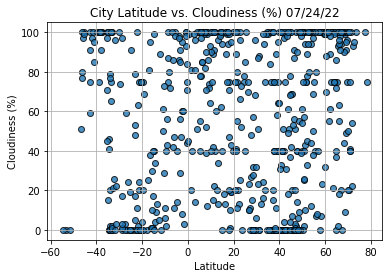

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

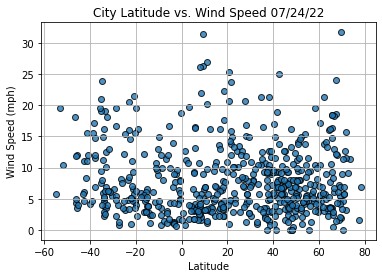

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dingle,PH,2022-07-25 03:19:32,10.9995,122.6711,86.65,71,89,1.12
2,Albany,US,2022-07-25 03:15:50,42.6001,-73.9662,74.26,86,99,6.44
5,Zhigansk,RU,2022-07-25 03:19:33,66.7697,123.3711,69.46,57,20,6.08
7,Gornopravdinsk,RU,2022-07-25 03:19:34,60.0500,69.9000,64.53,78,100,7.02
8,Bethel,US,2022-07-25 03:16:14,41.3712,-73.4140,80.76,76,0,0.00
...,...,...,...,...,...,...,...,...,...
573,Baruun-Urt,MN,2022-07-25 03:36:34,46.6806,113.2792,79.97,29,51,9.24
577,Amazar,RU,2022-07-25 03:36:36,53.8580,120.8750,83.26,40,12,6.64
579,Glomfjord,NO,2022-07-25 03:36:36,66.8167,13.9667,56.44,84,100,6.64
580,Mandalgovi,MN,2022-07-25 03:36:37,45.7625,106.2708,71.64,40,53,9.71


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dingle,PH,2022-07-25 03:19:32,10.9995,122.6711,86.65,71,89,1.12
2,Albany,US,2022-07-25 03:15:50,42.6001,-73.9662,74.26,86,99,6.44
5,Zhigansk,RU,2022-07-25 03:19:33,66.7697,123.3711,69.46,57,20,6.08
7,Gornopravdinsk,RU,2022-07-25 03:19:34,60.0500,69.9000,64.53,78,100,7.02
8,Bethel,US,2022-07-25 03:16:14,41.3712,-73.4140,80.76,76,0,0.00


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

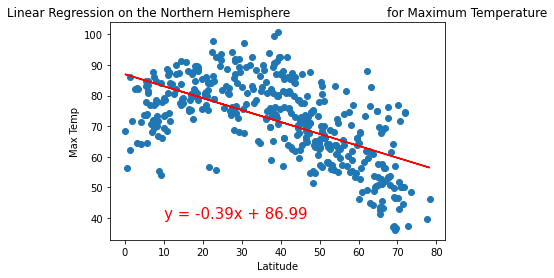

In [22]:
# Linear regression on the Northern Hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

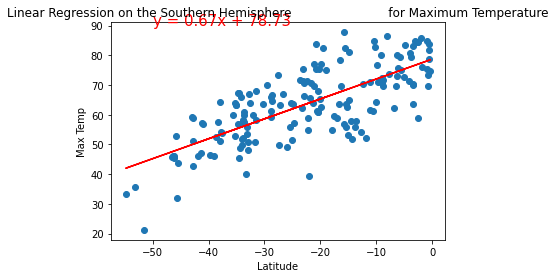

In [23]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

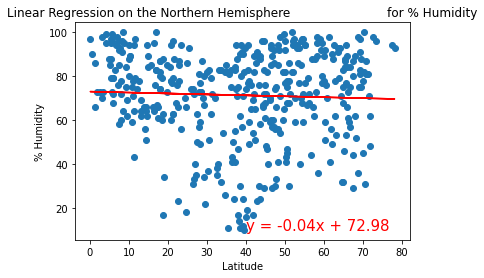

In [24]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

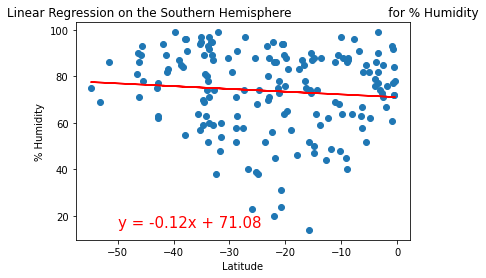

In [25]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

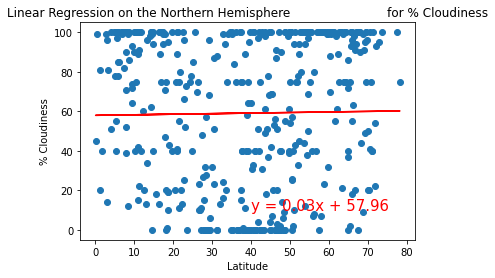

In [26]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

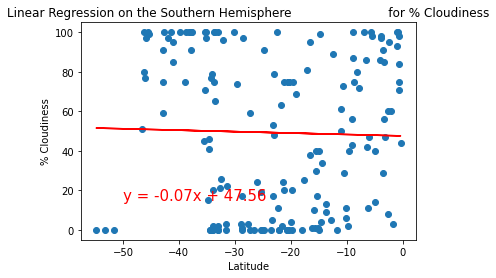

In [27]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

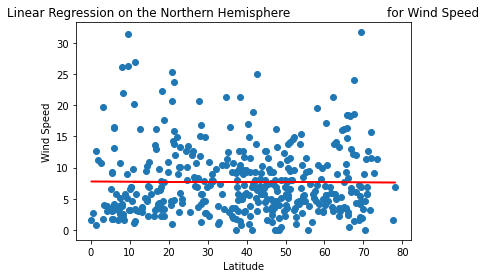

In [28]:
# Linear regression on the Northern Hemisphere for wind
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

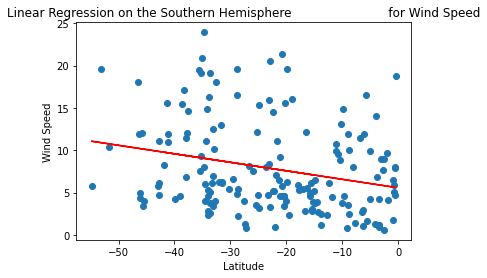

In [29]:
# Linear regression on the Southern Hemisphere for wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))